<a href="https://colab.research.google.com/github/vick3toria/vick3toria/blob/main/HBOMaxTvShows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/titles.csv')
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3294 non-null   object 
 1   title                 3294 non-null   object 
 2   type                  3294 non-null   object 
 3   description           3282 non-null   object 
 4   release_year          3294 non-null   int64  
 5   age_certification     2086 non-null   object 
 6   runtime               3294 non-null   int64  
 7   genres                3294 non-null   object 
 8   production_countries  3294 non-null   object 
 9   seasons               756 non-null    float64
 10  imdb_id               2968 non-null   object 
 11  imdb_score            2922 non-null   float64
 12  imdb_votes            2911 non-null   float64
 13  tmdb_popularity       3261 non-null   float64
 14  tmdb_score            3026 non-null   float64
dtypes: float64(5), int64(

In [ ]:
print(data.isnull().sum())

id                         0
title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64


In [ ]:
#data['duration'] =  data['duration'].str.strip(' min')

In [ ]:
data.fillna(0,  inplace=True)
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],0.0,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],0.0,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],0.0,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,0,116,"['thriller', 'crime']",['US'],0.0,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,0,100,"['thriller', 'romance', 'crime']",['US'],0.0,tt0033870,8.0,156603.0,12.788,7.8


In [ ]:
data['genres'] = data['genres'].astype(str).str.replace(']', '')
data['genres'] = data['genres'].astype(str).str.replace('[', '')
data['genres'] = data['genres'].astype(str).str.replace(' ', '')
data['genres'] = data['genres'].astype(str).str.replace("'", "")

pd.Series(data.genres.str.split(',').sum()).value_counts()

<ipython-input-17-fab1eb4e5015>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genres'] = data['genres'].astype(str).str.replace(']', '')
<ipython-input-17-fab1eb4e5015>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genres'] = data['genres'].astype(str).str.replace('[', '')


drama            1443
comedy           1120
documentation     716
thriller          612
action            598
crime             532
romance           514
fantasy           431
scifi             416
animation         345
european          339
family            336
horror            221
history           187
music             145
sport             123
war               116
reality            77
western            55
                   53
dtype: int64

In [ ]:
data['production_countries'] = data['production_countries'].astype(str).str.replace(']', '')
data['production_countries'] = data['production_countries'].astype(str).str.replace('[', '')
data['production_countries'] = data['production_countries'].astype(str).str.replace(' ', '')
data['production_countries'] = data['production_countries'].astype(str).str.replace("'", "")
data['production_countries'].value_counts()

pd.Series(data.production_countries.str.split(',').sum()).value_counts()

<ipython-input-18-54c56ba35c3c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['production_countries'] = data['production_countries'].astype(str).str.replace(']', '')
<ipython-input-18-54c56ba35c3c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['production_countries'] = data['production_countries'].astype(str).str.replace('[', '')


US    2442
GB     328
FR     182
JP     159
       110
      ... 
EC       1
RW       1
AF       1
GR       1
PA       1
Length: 74, dtype: int64

<AxesSubplot:>

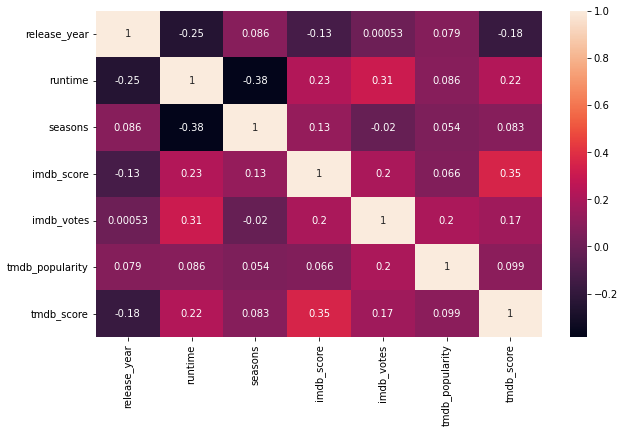

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(data.corr(), ax=ax, annot = True)

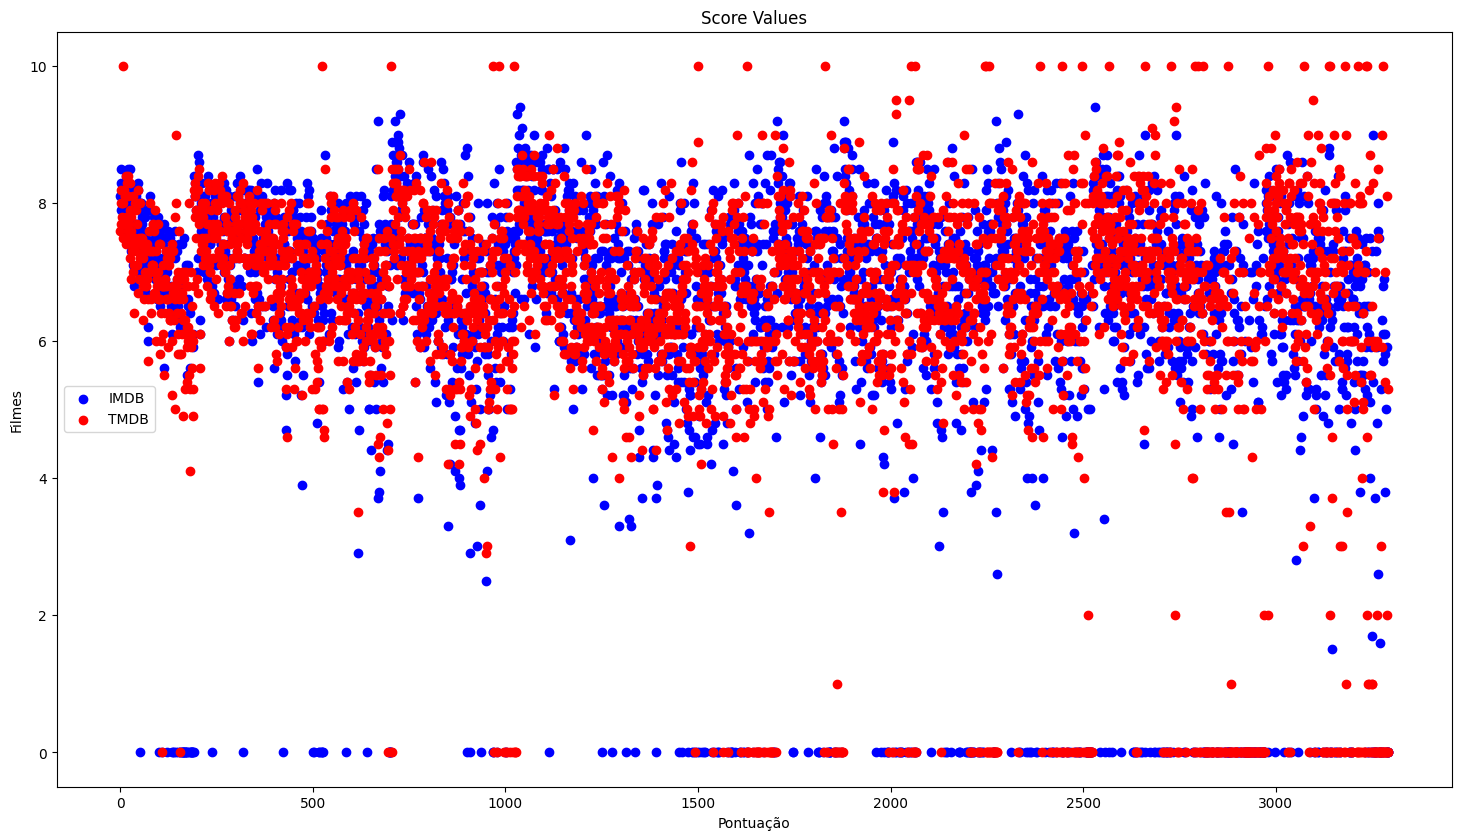

In [ ]:
plt.scatter(x = 'data.id' , y='data.imdb_score')

In [ ]:
#from google.colab import files
#data.to_csv('hbotvshows.csv') 
#files.download('hbotvshows.csv')